In [33]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [34]:
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/21/1482330032.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/21/1482329065.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/21/1482359330.h5'
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/22/1482393086.h5'

In [35]:
h = katdal.open(filename)

In [36]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/22/1482393086.h5 (version 3.0)
Observer: Fannie  Experiment ID: 20161222-0002
Description: 'Generic Phaseup for all targets'
Observed from 2016-12-22 09:51:32.161 SAST to 2016-12-22 09:56:12.042 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m003,m006,m008,m010,m014,m015,m021,m022,m025,m031,m062,m063  24      312
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m008', 'm003', 'm014', 'm006', 'm063', 'm015', 'm021', 'm010', 'm022', 'm025', 'm031', 'm062']
  spw=0
-------------------------------------------------------------------------------
Shape: (70 dumps, 4096 channe

In [37]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  51
    cal_product_K  ---  50
    cal_product_G  ---  175


In [38]:
np.set_printoptions(precision=4,suppress=True)

In [39]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V162">
[['m003', 'm006', 'm008', 'm010', 'm014', 'm015', 'm021', 'm022', 'm025', 'm031', 'm062', 'm063']]
['m003' 'm006' 'm008' 'm010' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031'
 'm062' 'm063']


# Delays

In [40]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [41]:
k_array.shape #Times,Pols,Antennas

(50, 2, 12)

In [42]:
# print delays (if there are few delays)
print 'POL 0: \n', k_0[0], "\n",k_0[-1]
print 'POL 1: \n', k_1[0],"\n" ,k_1[-1]

POL 0: 
[-283.6145  106.4487   88.8905    5.5363   86.5451  108.5628  486.0116
  538.104     0.      -56.4266   87.9142   85.2978] 
[-0.0325 -0.0332 -0.0208 -0.0329 -0.0207 -0.0282 -0.0256 -0.0157 -0.
 -0.0205 -0.0364 -0.0081]
POL 1: 
[-1628.1187   108.3891    87.9058    97.8341    86.6798   106.8464
   577.1942   535.8009     0.       -56.5439    82.6207    80.0424] 
[-0.0348 -0.0207 -0.0122 -0.0306 -0.0156 -0.025  -0.0133 -0.008  -0.
 -0.0213 -0.0241 -0.0002]


In [43]:
print labels

['m003' 'm006' 'm008' 'm010' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031'
 'm062' 'm063']


In [44]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

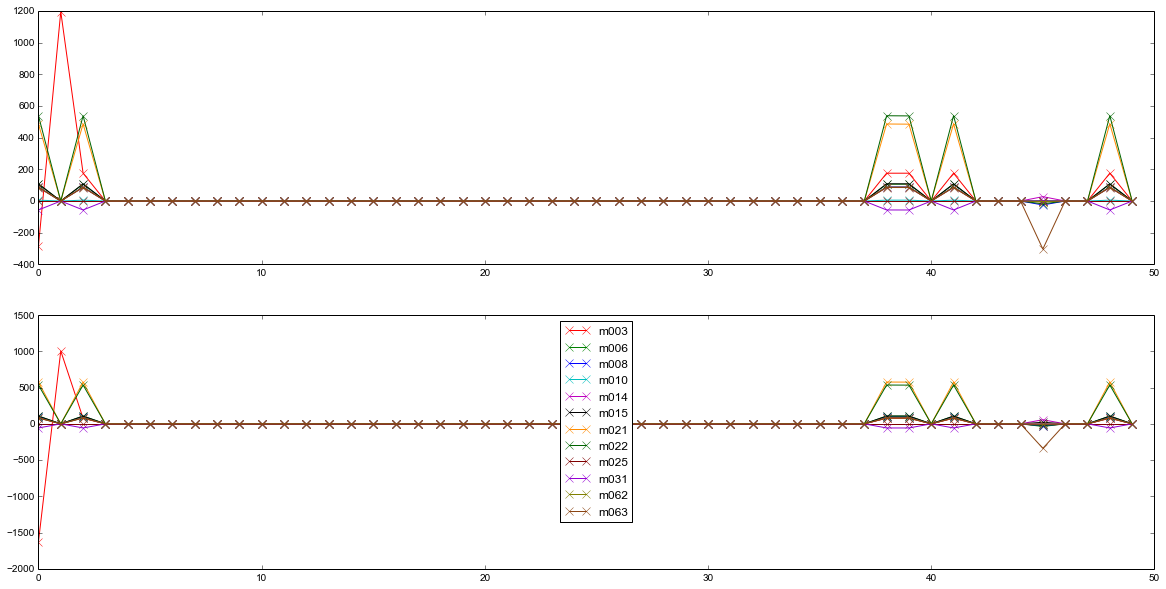

In [45]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')

# Gains

In [46]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(175, 2, 12)


In [47]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 0.9316  1.0412  0.9768  0.9851  0.9805  1.0373  1.0019  1.0289  1.0306
  0.9574  0.9636  0.988 ]
[ 1.0274  0.9661  1.0811  1.0398  0.9505  0.924   1.0736  1.0255  1.0331
  0.9652  1.0131  0.8702]


In [48]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 1.0043  1.0066  1.0051  1.0039  1.0043  1.0053  1.001   0.9981  1.0036
  1.0017  1.0051  1.0056]
[ 1.0058  1.006   1.0034  1.0037  1.0058  1.0054  1.0008  1.      1.0034
  1.0034  1.0049  1.0054]


In [49]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 1.078   0.9668  1.029   1.0191  1.0243  0.9691  0.9991  0.9701  0.9738
  1.0463  1.0431  1.0178]
[ 0.979   1.0413  0.9281  0.9653  1.0582  1.0881  0.9321  0.9751  0.9712
  1.0396  0.9919  1.1554]


In [50]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[ 3.9563  4.4928  7.7598  7.3297  7.5411  8.3155  8.9596  7.8284 -0.
  3.5925  8.8143  7.1478]
[ 10.6488   9.7031   6.8493   4.4474   9.9431   9.5347  15.4003  10.118
   0.       3.8641   8.7932  11.3413]


In [51]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[ 14.9548  13.4161   8.5575  14.1625   9.8136  14.0034  13.3282   6.8128
  -0.       9.9428  10.8254   9.6729]
[ 15.8233   7.4778   4.3373  13.051    7.4072  12.5809   7.4104   2.7646
   0.      10.2926   4.9799   5.9868]


In [52]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[ 10.9985   8.9233   0.7977   6.8328   2.2725   5.6879   4.3686  -1.0156
  -0.       6.3503   2.011    2.5251]
[ 5.1745 -2.2253 -2.512   8.6036 -2.5359  3.0462 -7.99   -7.3534  0.
  6.4285 -3.8134 -5.3545]


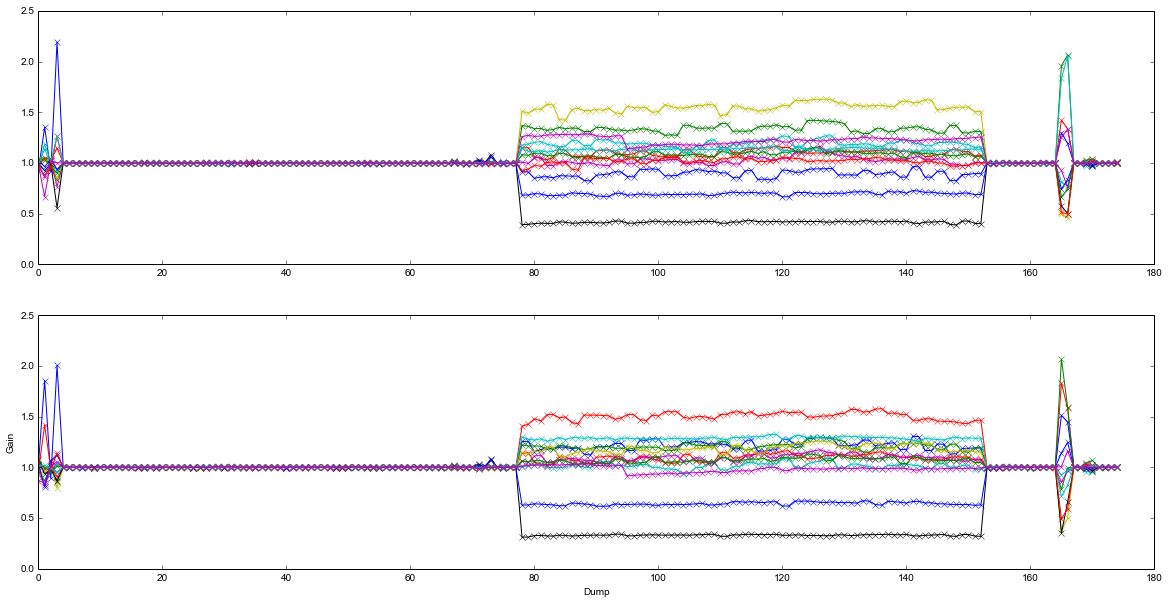

In [53]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

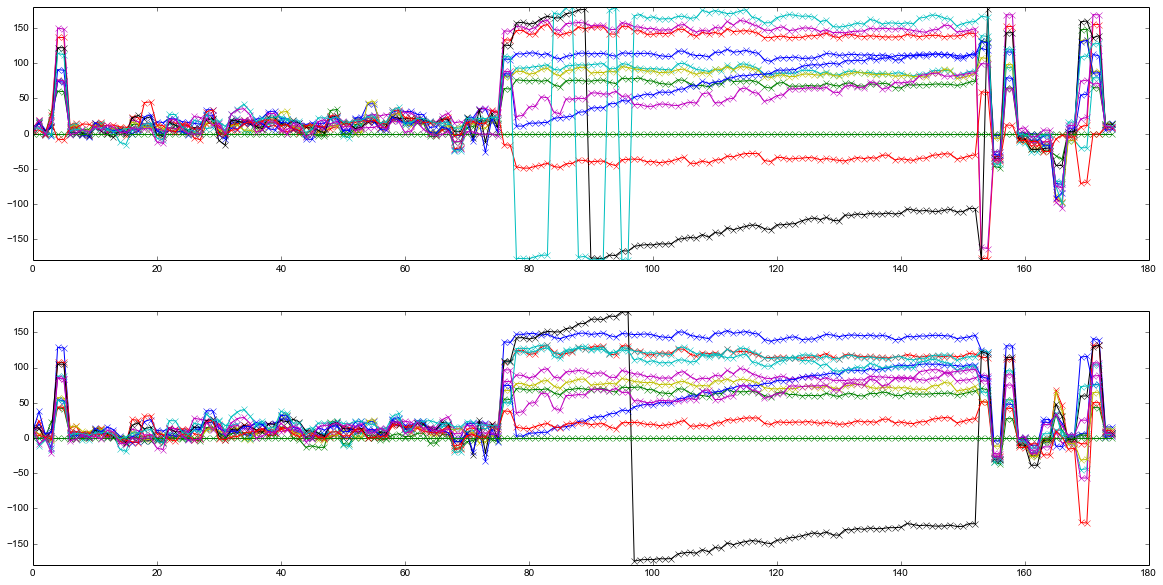

In [54]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [55]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(51, 4096, 2, 12)


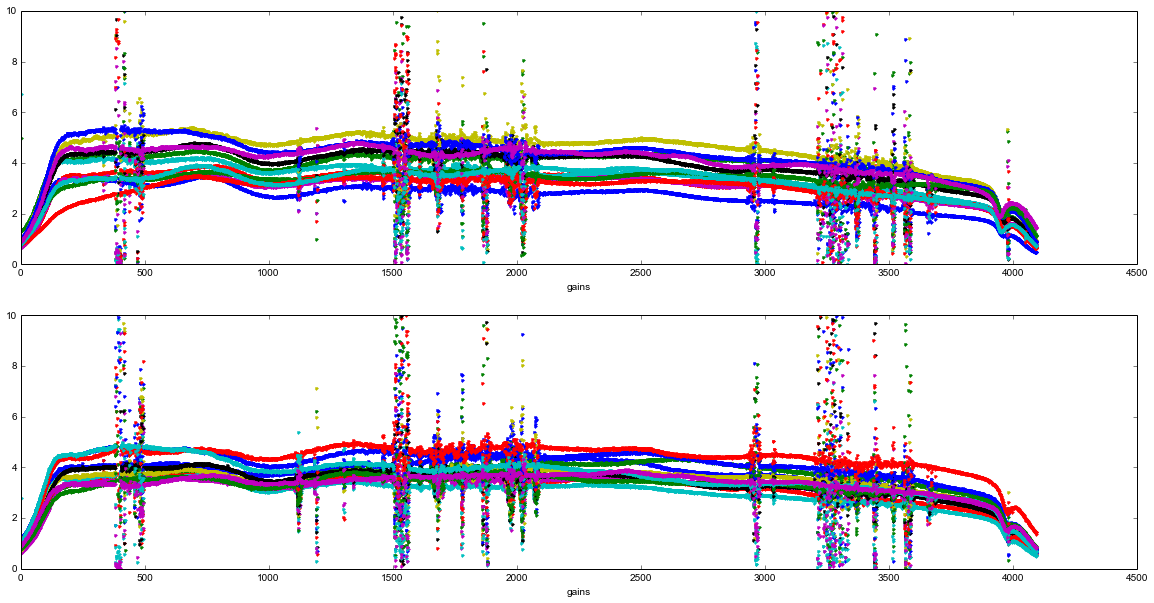

In [56]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

In [57]:
""""
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')
"""

'"\nfor i in range(len(labels)):\n    ax[0].plot(k_0[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[0].set_ylim([-0.2,0.2]);\n    ax[1].plot(k_1[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[1].set_ylim([-0.2,0.2]);\nplt.legend(loc=\'upper center\')\n'

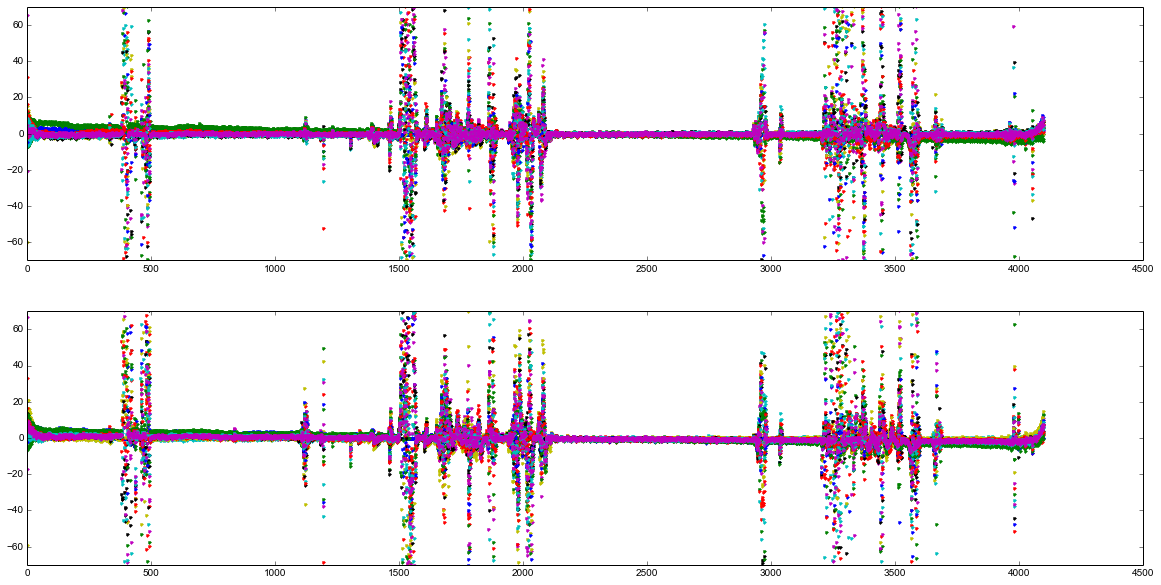

In [58]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].set_ylim([-70,70]);
ax[1].set_ylim([-70,70]);
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
plt.legend()

In [59]:
len(labels)

12

In [60]:
b_array.shape
# Time,channels,pols,antennas

(51, 4096, 2, 12)

In [61]:
#One bandpass at the END
antn=11
b_0_1 = b_array[-1,:,0,antn]
b_1_1 = b_array[-1,:,1,antn]
print b_1_1.shape
print a_array[:,antn]

(4096,)
['m063']


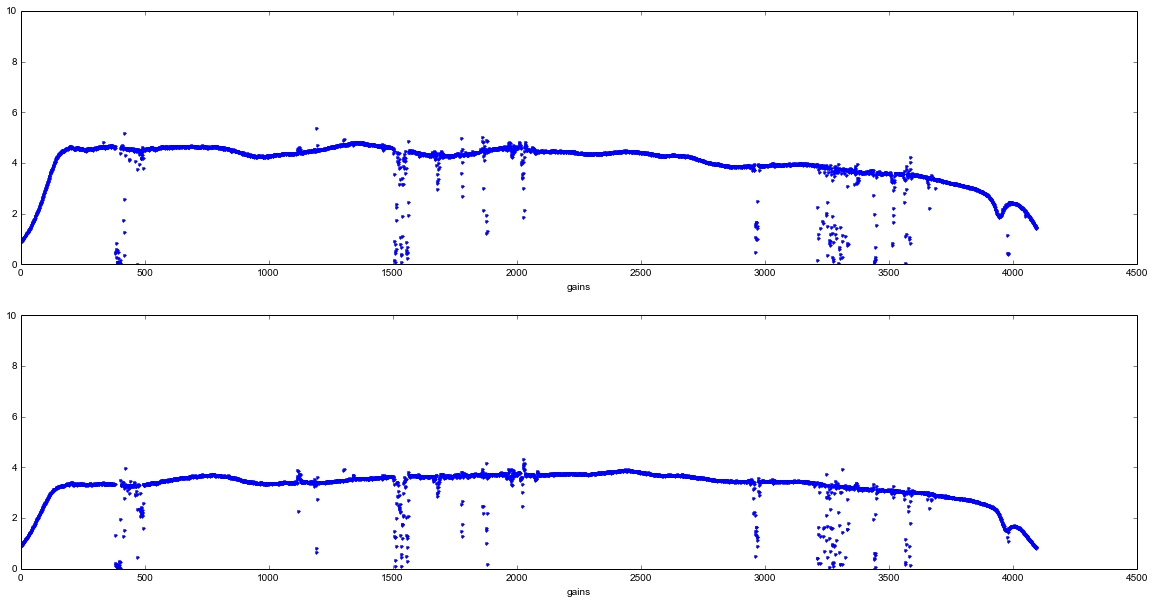

In [62]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

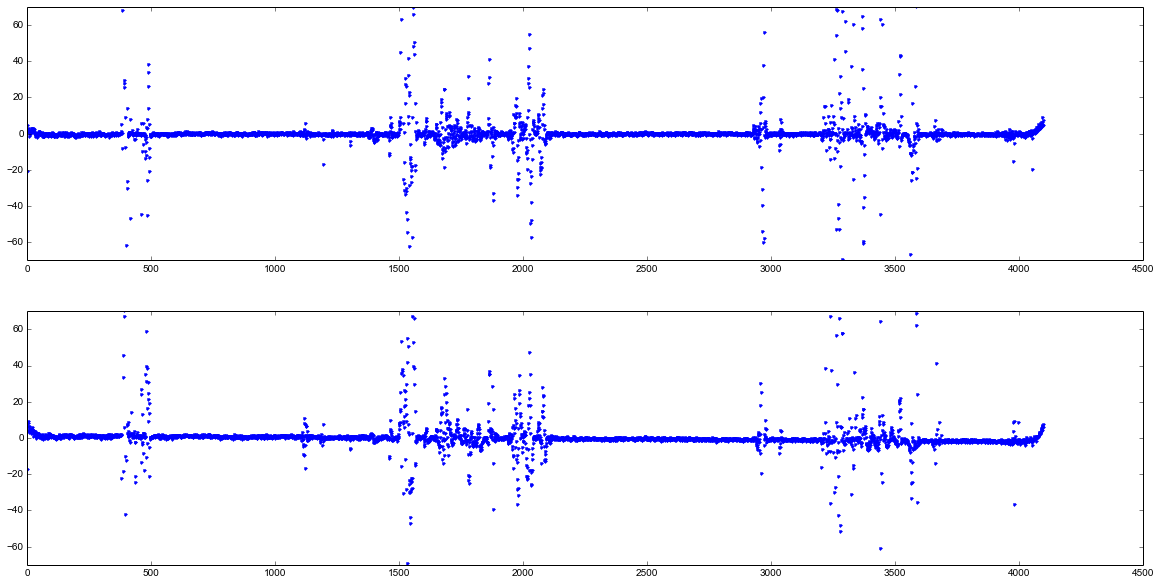

In [63]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);

In [64]:
str(h.catalogue.targets[0])

'PKS 1934-63 (J1939-6342), tags=radec bfcal single_accumulation, 19:39:25.03 -63:42:45.7, flux defined for 200 - 12000 MHz'